## Python Implementation of Ng's Course - Ex - 2
(Not exactly an implemetation as sklearn models are used instead of using Numpy for actual coding the loss functions etc..)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

### Dataset

In [2]:
admsn_data = pd.read_csv('ex2data1.txt',header=None)
admsn_data.columns = ['Exam 1','Exam 2','Decission']
admsn_data.head()

,Exam 1,Exam 2,Decission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### Visualizations

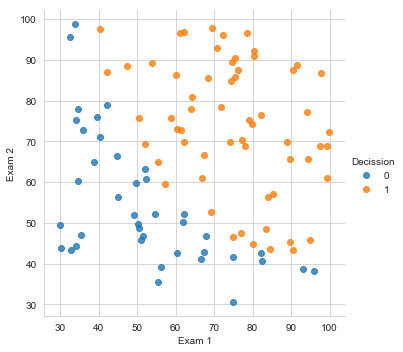

In [3]:
sns.lmplot(x = 'Exam 1',y = 'Exam 2', data = admsn_data,hue = 'Decission',fit_reg=False,logistic=True)

/home/sourabh/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


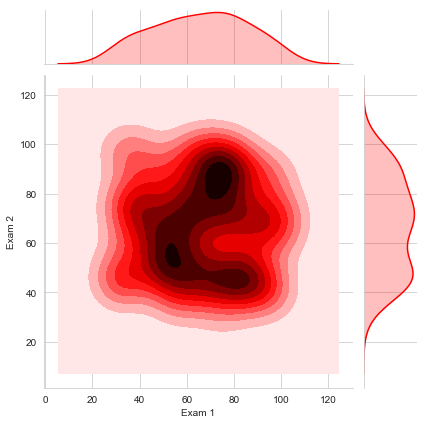

In [4]:
sns.jointplot(x = 'Exam 1',y = 'Exam 2', data = admsn_data,kind='kde', color = 'red')

### Model and Training -- sklearn used..
(no big deal)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = admsn_data[['Exam 1','Exam 2']]
X.head()

,Exam 1,Exam 2
0,34.623660,78.024693
1,30.286711,43.894998
2,35.847409,72.902198
3,60.182599,86.308552
4,79.032736,75.344376


In [7]:
y = admsn_data['Decission']
y.head()

0    0
1    0
2    0
3    1
4    1
Name: Decission, dtype: int64

### Train - Test

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
lg = LogisticRegression()

In [11]:
lg.fit(X_train,y_train)

/home/sourabh/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
predict_admisn = lg.predict(X_test)

In [13]:
from sklearn.metrics import classification_report

In [14]:
print(classification_report(y_test,predict_admisn))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.88      1.00      0.94        23

   micro avg       0.91      0.91      0.91        33
   macro avg       0.94      0.85      0.88        33
weighted avg       0.92      0.91      0.90        33



In [31]:
X_test['Decission'] = y_test
X_test['Predict'] = predict_admisn
X_test.head()

/home/sourabh/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/sourabh/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Exam 1,Exam 2,Decission,Predict
83,57.238706,59.514282,1,1
53,34.524514,60.396342,0,0
70,32.722833,43.307173,0,0
45,62.222676,52.060992,0,1
44,51.047752,45.822701,0,0


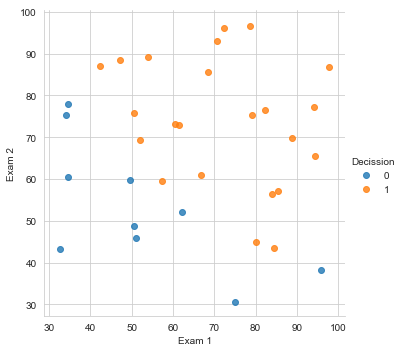

In [16]:
sns.lmplot(x = 'Exam 1',y = 'Exam 2', data = X_test,hue ='Decission',fit_reg=False,logistic=True)

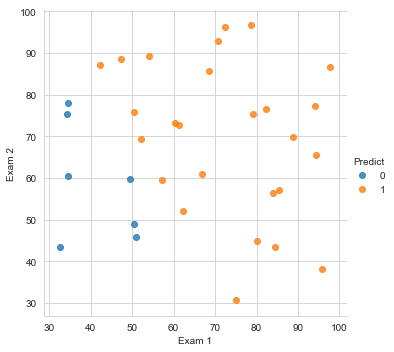

In [17]:
sns.lmplot(x = 'Exam 1',y = 'Exam 2', data = X_test,hue = 'Predict',fit_reg=False,logistic=True)

## 2nd exercise - Non linear Regression
Chip Dataset

In [18]:
chip_data = pd.read_csv('ex2data2.txt',header=None)
chip_data.columns = ['Test 1','Test 2','Decission']
chip_data.head()

,Test 1,Test 2,Decission
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


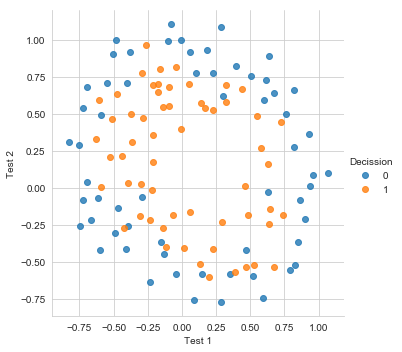

In [19]:
sns.lmplot(x = 'Test 1', y = 'Test 2',data = chip_data ,hue = 'Decission',fit_reg=False)

In [20]:
X1 = chip_data[['Test 1','Test 2']]
y1 = chip_data['Decission']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=101)

In [21]:
from sklearn import svm

In [22]:
clf = svm.NuSVC(gamma = 'auto')
clf.fit(X1_train, y1_train)

NuSVC(cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, nu=0.5, probability=False, random_state=None,
   shrinking=True, tol=0.001, verbose=False)

In [23]:
pred = clf.predict(X1_test)

In [24]:
print(classification_report(y1_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89        19
           1       0.86      0.95      0.90        20

   micro avg       0.90      0.90      0.90        39
   macro avg       0.90      0.90      0.90        39
weighted avg       0.90      0.90      0.90        39



In [28]:
X1_test['Decission'] = y1_test
X1_test['Predict'] = pred
X1_test.head()

/home/sourabh/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/sourabh/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Test 1,Test 2,Decission,Predict
13,0.73675,-0.184940,1,1
68,0.93836,0.012427,0,0
54,-0.20795,0.173250,1,1
21,-0.62846,0.334060,1,1
67,0.96141,0.085526,0,0


### Comparison of predicted and Actual

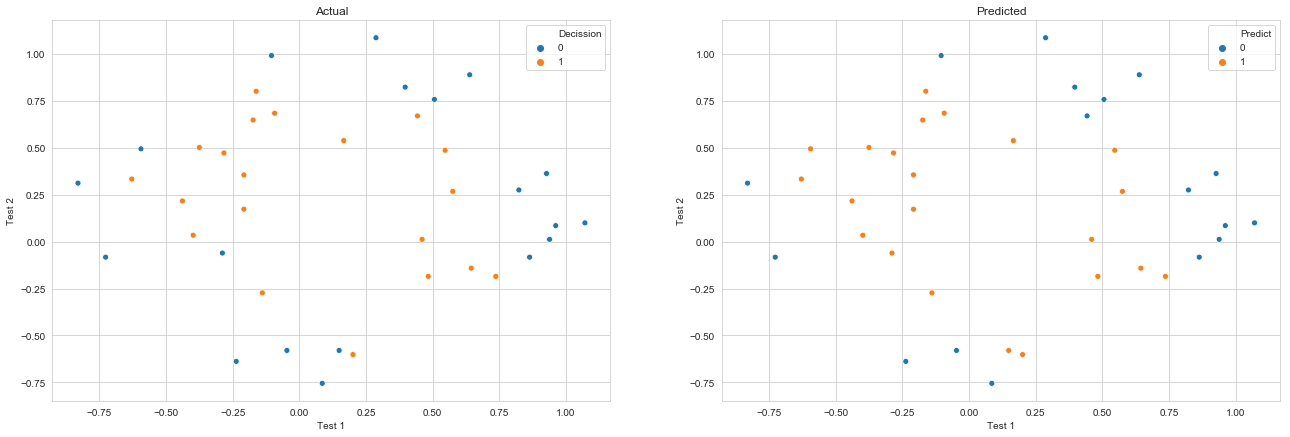

In [34]:
fig, axs = plt.subplots(ncols=2,figsize = (22,7))
sns.scatterplot(x = 'Test 1', y = 'Test 2',data = X1_test ,hue = 'Decission',ax = axs[0])
axs[0].title.set_text('Actual')
sns.scatterplot(x = 'Test 1', y = 'Test 2',data = X1_test ,hue = 'Predict',ax = axs[1])
axs[1].title.set_text('Predicted')

Given the simplicity of dataset and no grid search on SVC accuracy of 90% was acheived.